In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df = pd.read_excel('kmeancluster.xlsx')

In [8]:
df

,Name,Age,Income($)
0,Bob,27,70000
1,Micheal,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kony,47,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


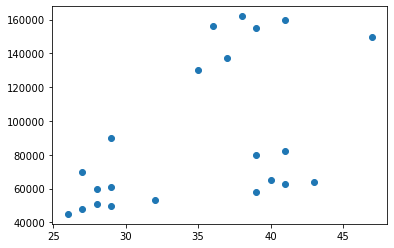

In [9]:
plt.scatter(df['Age'],df['Income($)'])

In [11]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [13]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [14]:
df['cluster'] = y_predicted

In [15]:
df

,Name,Age,Income($),cluster
0,Bob,27,70000,0
1,Micheal,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kony,47,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


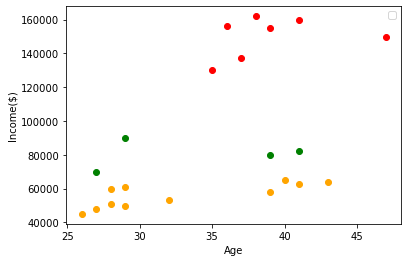

In [22]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='orange')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

# here you can see a problem in green and orange it is because the difference of salary in compare to difference of age is very high.it is straching the graph

# so we use minmaxscaler it scale all value in between 0 to 1 that is easy to plot and it'll not make problem 

In [23]:
scaler = MinMaxScaler()
scaler

MinMaxScaler()

In [24]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [26]:
df['Income($)'] = scaler.transform(df[['Income($)']])

In [27]:
df

,Name,Age,Income($),cluster
0,Bob,27,0.213675,0
1,Micheal,29,0.384615,0
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kony,47,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [29]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])

In [30]:
df

,Name,Age,Income($),cluster
0,Bob,0.047619,0.213675,0
1,Micheal,0.142857,0.384615,0
2,Mohan,0.142857,0.136752,2
3,Ismail,0.095238,0.128205,2
4,Kony,1.000000,0.897436,1
5,Gautam,0.619048,0.940171,1
6,David,0.714286,0.982906,1
7,Andrea,0.571429,1.000000,1
8,Brad,0.476190,0.948718,1
9,Angelina,0.428571,0.726496,1


In [32]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [33]:
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [34]:
df.drop('cluster',axis=1)

,Name,Age,Income($)
0,Bob,0.047619,0.213675
1,Micheal,0.142857,0.384615
2,Mohan,0.142857,0.136752
3,Ismail,0.095238,0.128205
4,Kony,1.000000,0.897436
5,Gautam,0.619048,0.940171
6,David,0.714286,0.982906
7,Andrea,0.571429,1.000000
8,Brad,0.476190,0.948718
9,Angelina,0.428571,0.726496


In [35]:
df.cluster = y_predicted

In [36]:
df

,Name,Age,Income($),cluster
0,Bob,0.047619,0.213675,1
1,Micheal,0.142857,0.384615,1
2,Mohan,0.142857,0.136752,1
3,Ismail,0.095238,0.128205,1
4,Kony,1.000000,0.897436,0
5,Gautam,0.619048,0.940171,0
6,David,0.714286,0.982906,0
7,Andrea,0.571429,1.000000,0
8,Brad,0.476190,0.948718,0
9,Angelina,0.428571,0.726496,0


In [37]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


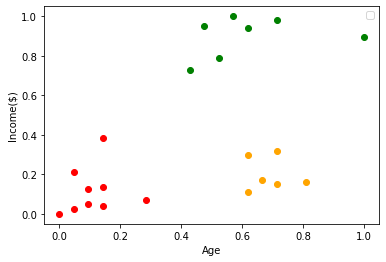

In [38]:
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='orange')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [39]:
km.cluster_centers_

array([[0.61904762, 0.8974359 ],
       [0.11111111, 0.11633428],
       [0.69047619, 0.2022792 ]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


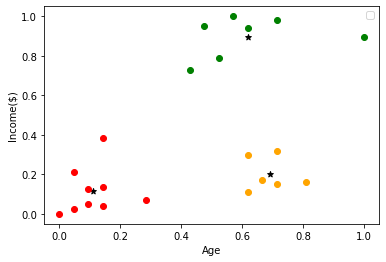

In [43]:
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker='*')
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='orange')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [46]:
k_rng = list(range(1,12))
k_rng

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [47]:
sse = []

In [48]:
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

C:\Users\Thinkpad\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [49]:
sse

[4.7788364294774555,
 1.7535125526578517,
 0.5185310250430317,
 0.3492188557308623,
 0.27065771398290733,
 0.18855233396594817,
 0.14903658467237746,
 0.11683499360108468,
 0.08657980139970375,
 0.06719025728488492,
 0.0515427315640991]

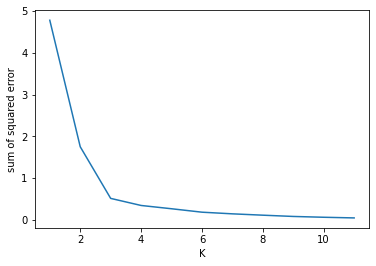

In [50]:
plt.xlabel('K')
plt.ylabel('sum of squared error')
plt.plot(k_rng,sse)

# we can clearly see elbow is at 3 here km.inertia_    gives sse 